# Analyse du taux d'attrition d'Orange 

Type de projet : Exploratory data analysis (EDA)

Projet réalisé par : Boukhatem Hadjer 


## Présentation du projet 

Le taux d'attrition (churn rate), soit le taux de désabonnement des clients sur une période donnée, est un indicteur clé de performance (KPI) important pour les entreprises du secteur des télécommunications. 
Le churn est un des principaux problèmes auxquels les entreprises de télécommunications font face. 
Il est plus coûteux d'acquérir un nouveau client que de le fidéliser. Dans ce contexte, la fidélisation des clients est primordiale. Le taux d'attrition annuel des entreprises du secteur des télécommunications varie de 12% à 24% environ. 

Identifier les facteurs qui influencent le taux d'attrition est donc essentiel pour prendre les mesures nécessaires à la réduction de ce taux et par conséquent améliorer la rétention des clients.
 
Le jeu de données sur lequel nous allons effectuer une analyse exploratoire est composé de données d'activité client d'Orange situés aux Etats-Unis. Les données ont déjà été nettoyées et le dataset comprend une colonne contenant un "churn label" qui précise si le client s'est désabonné.

L'objectif de ce projet est d'explorer et d'analyser les relations entre les différentes variables de notre dataset avec notre variable cible "Churn" afin d'identifier les facteurs clés qui influent sur le taux d'attrition et aider Orange à élaborer des stratégies pour le réduire.  


### Objectifs commerciaux 

-  Maximiser le profit d'Orange en améliorant la rétention des clients.
-  Réduire le taux d'attrition en identifiant les facteurs qui l'influencent. 












# 1. Comprendre les données

In [1]:
# Importation des bibliothèques numpy, pandas, matplotlib.pyplot et seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [348]:
# Importation du dataset 

telecom_df= pd.read_csv("Telecom Churn.csv")

telecom_df


pd.set_option("display.max_rows",None)

In [10]:
# Afficher les données des 5 premières lignes pour avoir un aperçu des données

telecom_df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [11]:
# Afficher les données des 5 dernières lignes pour avoir un aperçu des données

telecom_df.tail()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [12]:
# Shape du dataset

telecom_df.shape

(3333, 20)

In [13]:
# Nom de toutes les colonnes 

telecom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [419]:
# Informations sur le dataset 

telecom_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Comprendre des données de chaque colonne : 

-  State : nom de l'Etat (51 Etats uniques)
-  Account length : durée d'activité du compte en jours
-  Area code : numéro de code régional couvrant certains Etats
-  International plan : Yes indique que le client est abonné à un forfait international et No indique que le client n'est pas abonné à un forfait international
-  Voice mail plan : Yes indique que le forfait inclus la messagerie vocale et No indique que le forfait du client n'inclus pas la messagerie vocale 
-  Number vmail messages : nombre de messages vocaux
-  Total day minutes : Total des minutes d'appels passés le jour 
-  Total day calls : Nombre d'appels passés en journée
-  Total day charge : Montant total facturé au client en journée
-  Total eve minutes :  Total des minutes d'appels passés le soir 
-  Total eve calls : Nombre d'appels passés le soir 
-  Total eve charge : Montant total facturé au client le soir
-  Total nights minutes : Total des minutes d'appels passés la nuit 
-  Total nights calls : Nombre d'appels passés la nuit
-  Total night charge : Montant total facturé au client la nuit
-  Total intl minutes : Total des minutes d'appels passés à l'international  
-  Total intl calls : Nombre d'appels passés à l'international
-  Total intl charge : Montant total facturé au client pour les appels passés à l'international
-  Customer service calls : Nombre d'appels au service client effectués par le client
-  Churn : True signifie que le client s'est désabonné, False signifie que le client n'est pas désabonné



In [15]:
# Nombre de valeurs uniques dans chaque colonne

telecom_df.nunique()


State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [392]:
# Résumé statistique du dataset 

telecom_df.describe(include='all')



,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total calls
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333,3333.000000,3333.000000
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850,NaN,NaN
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,...,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN,591.864776,591.864776
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,...,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN,89.954251,89.954251
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN,284.300000,284.300000
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,...,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN,531.500000,531.500000
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,...,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN,593.600000,593.600000
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,...,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN,652.400000,652.400000


In [23]:
# Nombre d'observations pour chaque valeur unique de la colonne "Churn"

telecom_df['Churn'].value_counts()


False    2850
True      483
Name: Churn, dtype: int64

In [27]:
# Vérifier les valeurs manquantes dans chaque colonne

telecom_df.isnull().sum()
telecom_df.isna().sum()



State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

<AxesSubplot:>

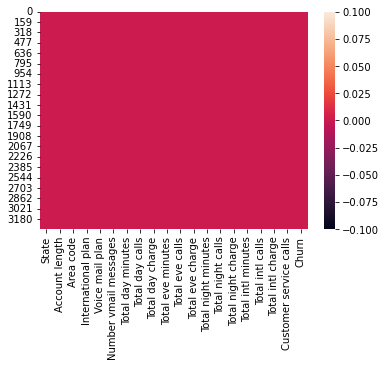

In [30]:
# Visualiser les données manquantes 

sns.heatmap(telecom_df.isnull())


In [32]:
# Vérifier si il y a des doublons 

telecom_df.duplicated().sum()

0

## Qu'avons-nous appris sur notre dataset ? 

- Notre dataset est composé de 3333 lignes et de 20 colonnes. 
-  Les valeurs de la colonne "Churn" sont de type boolean.  
-  8 colonnes sont de type float.
-  8 colonnes sont de type integer.
-  3 colonnes sont de type object.
-  Il n'y a pas de valeurs manquantes.
-  Il n'y a pas de doublons.


# Analyse exploratoire des données


## Analyse de la variable cible "Churn"


In [35]:
# Afficher les données uniques dans la colonne "Churn"

telecom_df["Churn"].unique()

array([False,  True])

In [38]:
# Nombre de True et de False dans la colonne "Churn"

telecom_df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

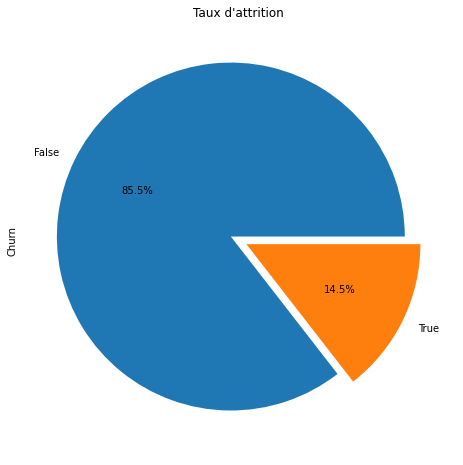

In [60]:
# Diagramme ciriculaire pour visualiser le pourcentage de clients désabonnés

telecom_df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%.1f%%', figsize=(8,8))
plt.title("Taux d'attrition")
plt.show()

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


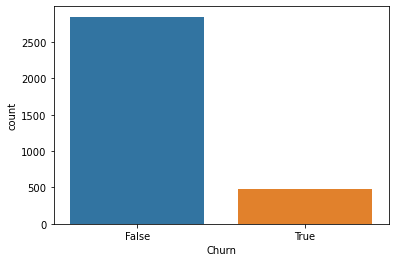

In [73]:
# Analyse du "Churn" en utilisant un countplot

sns.countplot(telecom_df["Churn"])
plt.show()


### Observation

En analysant la colonne "Churn", nous avons appris que 14,5% des clients se sont désabonnés. Interessons-nous aux autres variables et aux insights que nous pouvons tirer de leurs relations avec la variable "Churn".

## Analyse de la colonne "State"


In [76]:
# Nombre de valeurs uniques de la colonne "State"

telecom_df["State"].nunique()


51

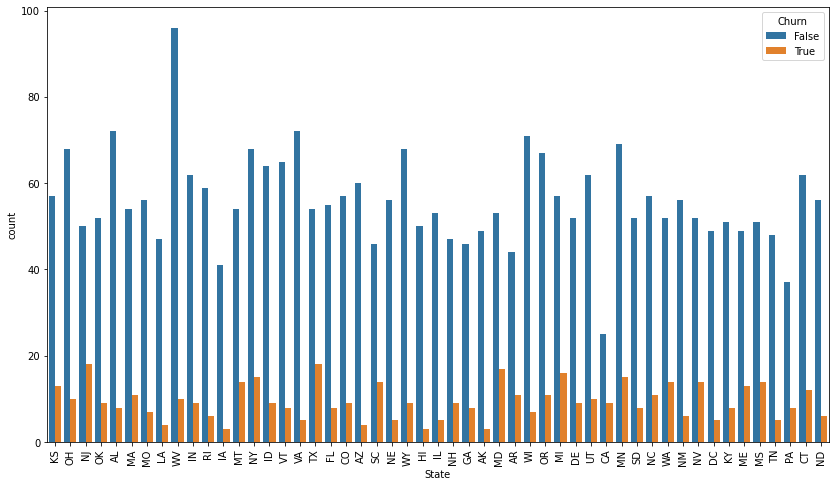

<Figure size 864x576 with 0 Axes>

In [393]:
# "Churn" par Etat en utilisant un countplot

plt.figure(figsize=(14,8))
sns.countplot(x="State", hue="Churn", data=telecom_df)
plt.xticks(rotation=90)
plt.figure(figsize=(12,8))
plt.show()

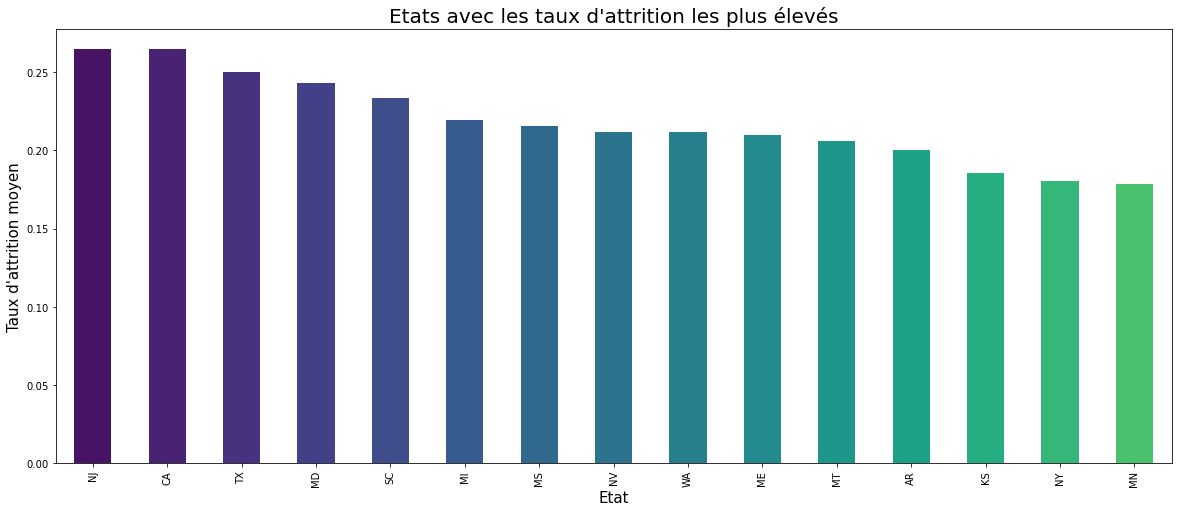

In [440]:
# Visualisation des Etats qui ont les taux d'attrition les plus élevés

palette = sns.color_palette("viridis", 20)  # Utilisez une palette de couleurs avec 20 couleurs

telecom_df.groupby(["State"])["Churn"].mean().sort_values(ascending= False).head(15).plot.bar(color=palette)
plt.title("Etats avec les taux d'attrition les plus élevés", fontsize = 20)
plt.xlabel("Etat", fontsize = 15)
plt.ylabel("Taux d'attrition moyen", fontsize = 15)
plt.show()


-  Nous constatons que sur les 51 Etats, 10 Etats ont un taux d'attrition supérieur à 20% (NJ, CA, TX, MD,SC, MI, MS, NV, WA, ME). 

In [424]:
# Etats qui ont les taux d'attrition les plus faibles 

telecom_df.groupby(["State"])["Churn"].mean().sort_values(ascending= True).head(20)*100

State
HI     5.660377
AK     5.769231
AZ     6.250000
VA     6.493506
IA     6.818182
LA     7.843137
NE     8.196721
IL     8.620690
WI     8.974359
RI     9.230769
DC     9.259259
TN     9.433962
WV     9.433962
NM     9.677419
ND     9.677419
AL    10.000000
VT    10.958904
MO    11.111111
WY    11.688312
ID    12.328767
Name: Churn, dtype: float64

-  Nous constatons que sur les 51 Etats, 15 Etats ont un taux d'attrition inférieur à 10% (HI, AK, AZ, VA, IA, LA, NE, IL, WI, RI, DC, TN, WV, NM, ND)

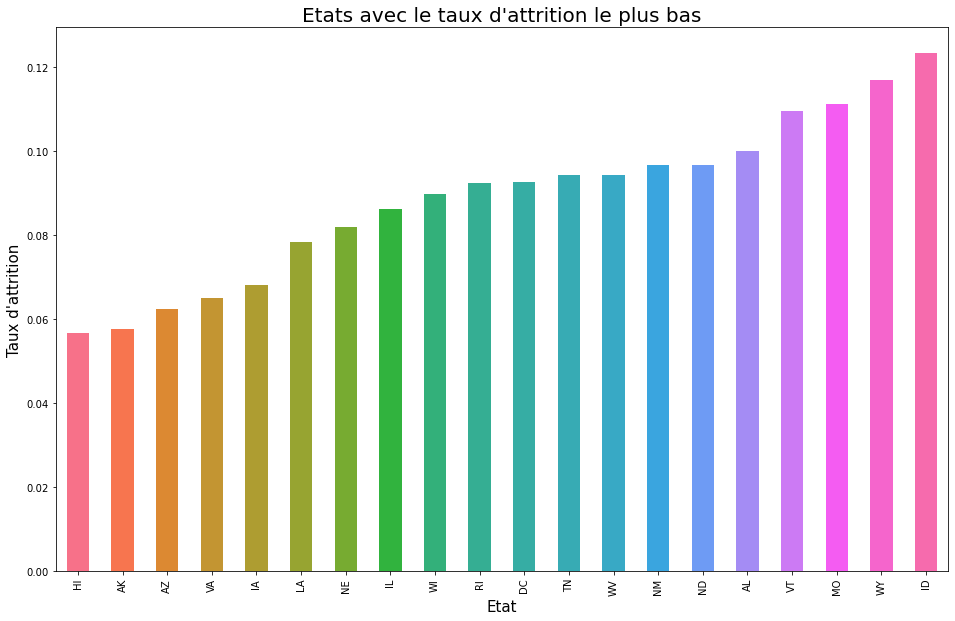

In [399]:
# Visualisation des Etats qui ont les taux d'attrition les plus faibles

palette = sns.color_palette("husl", 20) 
plt.figure(figsize=(16,10))
telecom_df.groupby(["State"])["Churn"].mean().sort_values(ascending= True).head(20).plot.bar(color = palette)
plt.title("Etats avec le taux d'attrition le plus bas", fontsize = 20)
plt.xlabel("Etat", fontsize = 15)
plt.ylabel("Taux d'attrition", fontsize = 15)
plt.show()

### Observation

Nous avons pu constater que de nombreux Etats (10 Etats) ont un taux d'attrition élevé (supérieur à 20%), cela peut s'expliquer par une mauvaise couverture réseau dans ces Etats.

## Analyse de la colonne "Area Code"


In [142]:
telecom_df["Area code"].nunique()

3

In [436]:
# Taux d'attrition par "Area Code"

Area_code_churn_perc= (telecom_df.groupby(["Area code"])["Churn"].mean()*100).reset_index()
Area_code_churn_perc

,Area code,Churn
0,408,14.558473
1,415,14.259819
2,510,14.880952


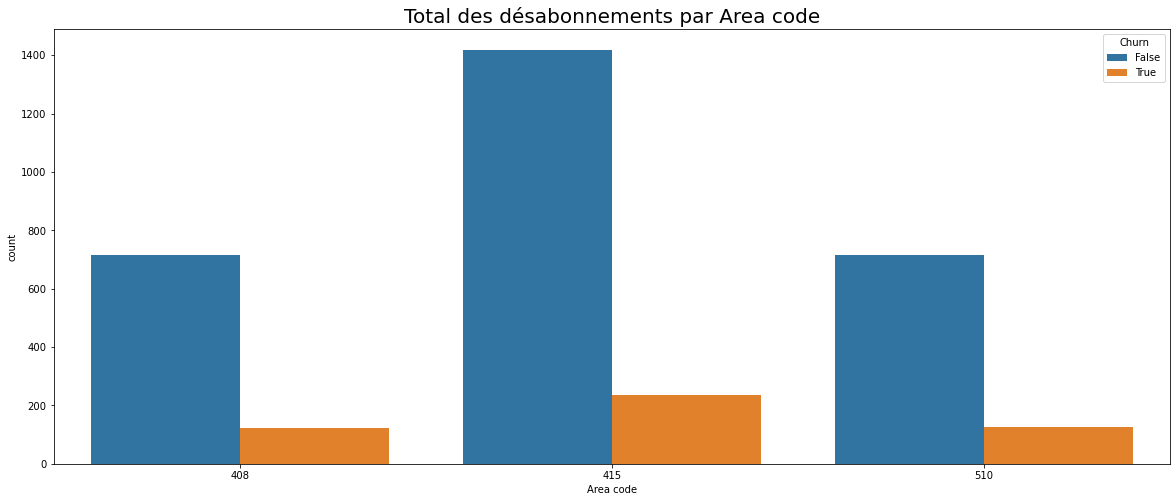

In [341]:
# Countplot du nombre de désabonnements par Area Code

sns.countplot(x="Area code",hue="Churn", data= telecom_df)
plt.title("Total des désabonnements par Area code", fontsize = 20)
plt.show()

### Observation

Nous constatons qu'il existe 3 Area code différents dans la colonne Area Code (408, 415 et 510) et que les taux d'attrition dans ces 3 Area code sont à peu près égaux (environ 14%). 
Nous ne pensons pas qu'il existe une relation entre l'Area code et le taux d'attrition. 

## Analyse de la colonne "Account length"



In [159]:
# Séparer les abonnés et les désabonnés 

churn_df= telecom_df[telecom_df["Churn"]== bool(True)]
not_churned_df= telecom_df[telecom_df["Churn"]==bool(False)]


In [154]:
churn_df


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [160]:
not_churned_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


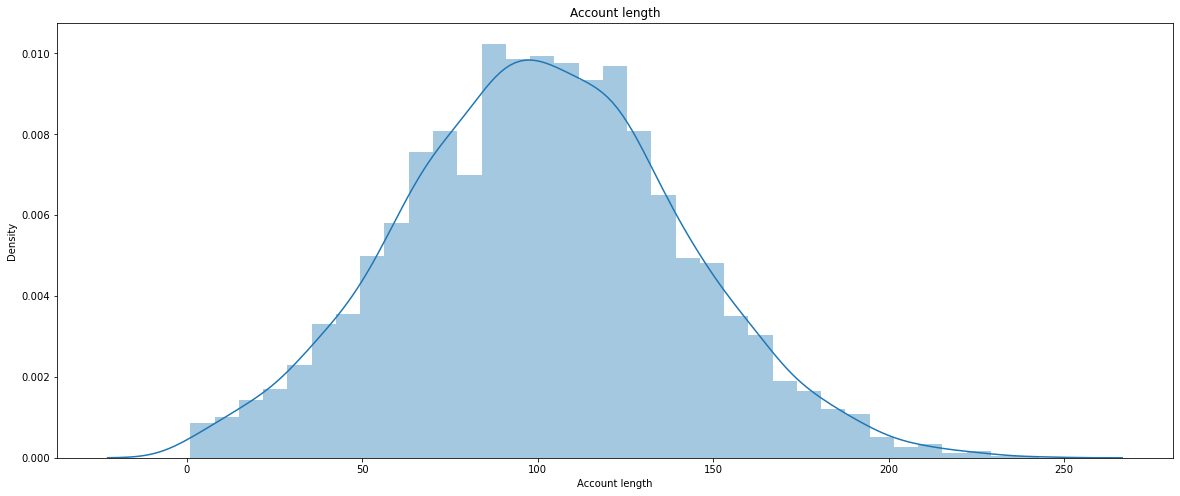

In [351]:
# Analyse de la distribution de "Account length" 

sns.distplot(telecom_df["Account length"]).set_title("Account length")
plt.show()

### Observation 

On constate que la variable "Account length" suit une loi normale, la distribution a une forme de cloche, elle est symétrique et la moyenne est à peu près égale à la médiane. 

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

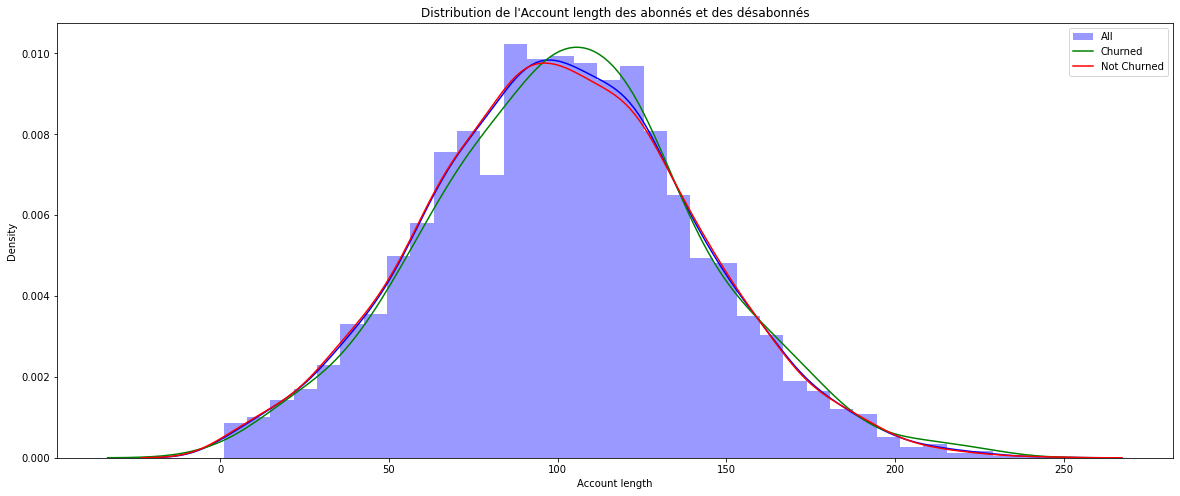

In [441]:
# Comparaison entre la distribution des variables "Account length" des désabonnés (churn) et les "Account length" des abonnés (not churned)

sns.distplot(telecom_df["Account length"],color= "blue", label = "All")
sns.distplot(churn_df["Account length"], color= "green", hist= False, label = "Churned")
sns.distplot(not_churned_df["Account length"], color= "red", hist= False, label = "Not Churned")  
plt.legend()
plt.title("Distribution de l'Account length des abonnés et des désabonnés")
plt.show()

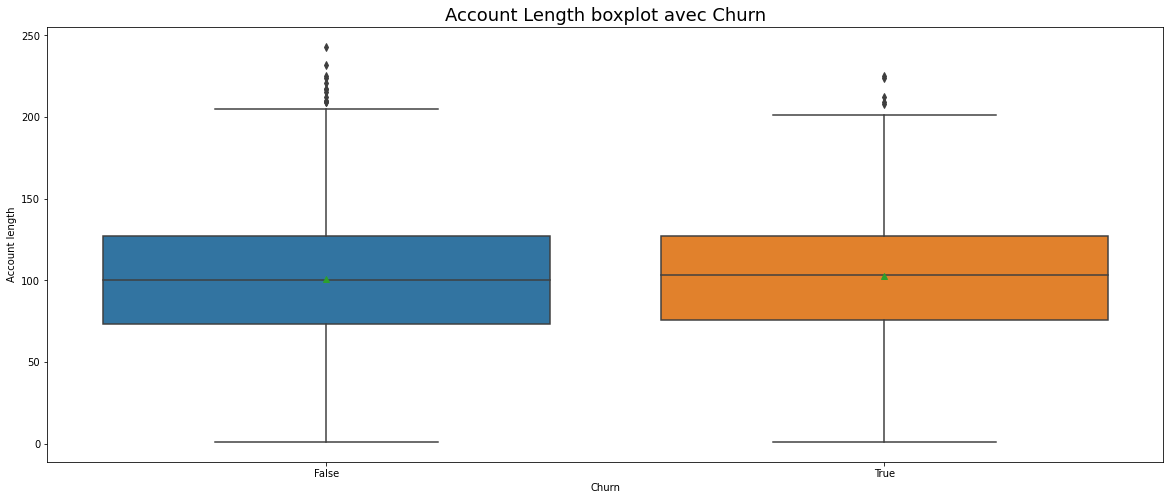

In [354]:
# Boxplot de l'Account length des abonnés et des désabonnés

sns.boxplot( x= "Churn", y= "Account length", data = telecom_df, showmeans = True)  
plt.title("Account Length boxplot avec Churn", fontsize=18)
plt.show()

### Observation 


Nous constatons que les variables qui représentent respectivement l'Account length des abonnés et l'Account length des désabonnés suivent toutes les 2 une loi normale, la médiane et la moyenne sont à peu près égales, ces 2 variables sont réparties de manière similaire.
Ces 2 variables ont des outliers (valeurs aberrantes).
Il n'existe pas de relation claire entre l'Account length et le taux d'attrition.

In [442]:
# "Account length" maximal = Valeur maximale de la colonne "Account length" (durée d'activité du compte client en jours) 
telecom_df[telecom_df["Account length"].max()==telecom_df["Account length"]] 


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total calls
817,UT,243,510,No,No,0,95.5,92,16.24,163.7,...,264.2,118,11.89,6.6,6,1.78,2,False,530.0,530.0


In [185]:
telecom_df["Account length"].sort_values(ascending= False)

817     243
1408    232
1751    225
1551    225
1886    224
       ... 
1838      1
2879      1
923       1
1409      1
2475      1
Name: Account length, Length: 3333, dtype: int64

In [189]:
# Analyse des "Account length" à 1 chiffre 

one_digit = telecom_df[telecom_df["Account length"]<=9]
one_digit

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
158,MO,6,510,No,No,0,183.6,117,31.21,256.7,72,21.82,178.6,79,8.04,10.2,2,2.75,1,False
671,CT,3,415,No,Yes,36,118.1,117,20.08,221.5,125,18.83,103.9,89,4.68,11.9,6,3.21,2,False
923,MS,1,415,No,No,0,144.8,107,24.62,112.5,66,9.56,218.7,79,9.84,13.8,3,3.73,1,False
960,AR,5,415,No,No,0,199.2,106,33.86,187.3,12,15.92,214.0,85,9.63,13.3,3,3.59,3,False
964,NY,9,408,No,Yes,31,193.8,130,32.95,202.6,98,17.22,191.2,102,8.60,13.3,2,3.59,1,False
1140,LA,9,415,No,Yes,39,214.1,108,36.40,169.2,115,14.38,189.7,117,8.54,10.1,3,2.73,1,False
1275,NV,3,510,No,Yes,27,67.4,116,11.46,244.0,78,20.74,281.1,93,12.65,11.4,2,3.08,2,False
1322,DE,2,415,Yes,No,0,132.1,42,22.46,138.9,88,11.81,192.6,119,8.67,9.1,1,2.46,2,True
1333,NV,7,408,No,Yes,30,221.4,114,37.64,165.8,116,14.09,247.0,105,11.12,10.8,12,2.92,1,False
1409,NJ,1,415,No,Yes,30,183.1,95,31.13,232.6,110,19.77,248.3,110,11.17,8.4,2,2.27,0,False


In [190]:
one_digit["Churn"].value_counts()

False    22
True      2
Name: Churn, dtype: int64

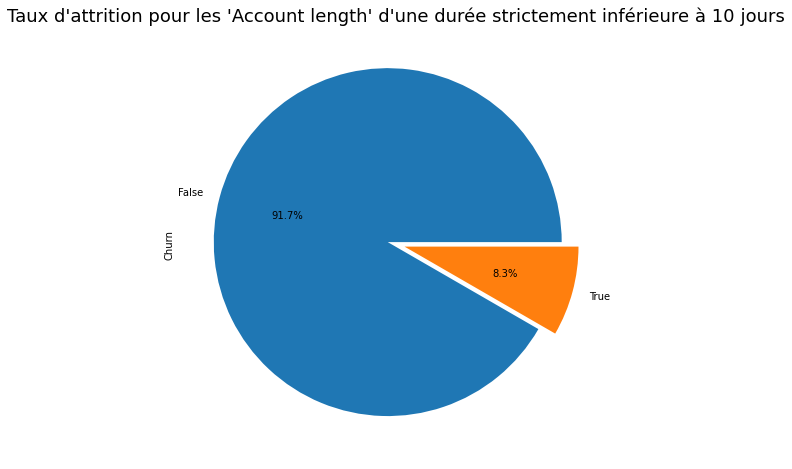

In [402]:
one_digit["Churn"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%.1f%%', figsize=(8,8))
plt.title("Taux d'attrition pour les 'Account length' d'une durée strictement inférieure à 10 jours", fontsize=18)
plt.show()

### Observation 

L'"Account length" représente la durée d'activité du compte client en jours. Nous constatons que le taux d'attrition des nouveaux clients (moins de 10 jours) est faible (8,3%). 


In [445]:
# Analyse des "Account length" à 2 chiffres 

two_digit = telecom_df[(telecom_df["Account length"]> 9) & (telecom_df["Account length"]<=99)]
two_digit.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total calls
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,564.8,564.8
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,512.0,512.0
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,208.8,111,9.40,12.7,6,3.43,4,True,579.1,579.1
11,RI,74,415,No,No,0,187.7,127,31.91,163.4,...,196.0,94,8.82,9.1,5,2.46,0,False,556.2,556.2
13,MT,95,510,No,No,0,156.6,88,26.62,247.6,...,192.3,115,8.65,12.3,5,3.32,3,False,608.8,608.8


In [444]:
two_digit["Churn"].value_counts()

False    1378
True      225
Name: Churn, dtype: int64

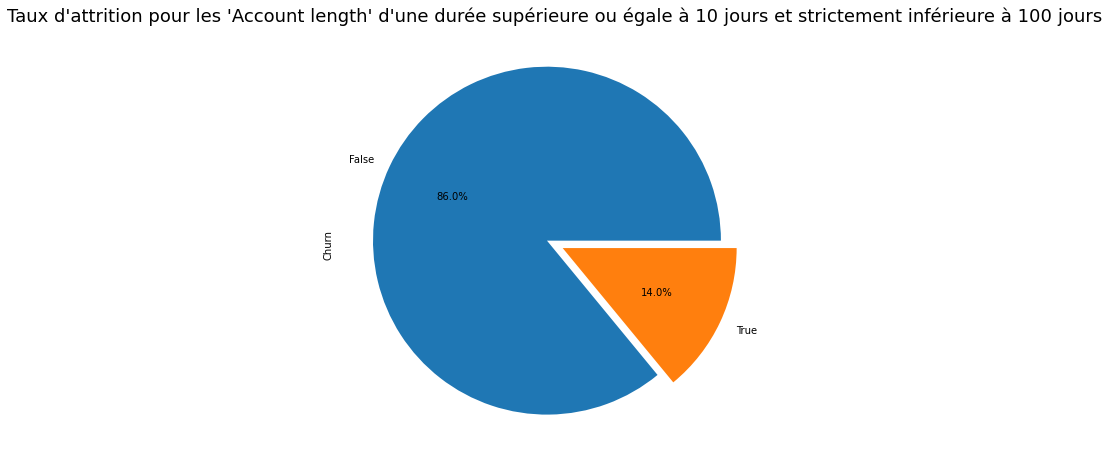

In [401]:
two_digit["Churn"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%.1f%%', figsize=(8,8))
plt.title("Taux d'attrition pour les 'Account length' d'une durée supérieure ou égale à 10 jours et strictement inférieure à 100 jours", fontsize=18)
plt.show()

### Observation

Le taux d'attrition s'élève à 14% pour les clients actifs depuis plus de 10 jours et moins de 100 jours.


In [446]:
# Analyse des "Account length" à 3 chiffres 

three_digit = telecom_df[(telecom_df["Account length"]> 99)]
three_digit.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total minutes,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,717.2,717.2
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,625.2,625.2
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,539.4,539.4
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,...,203.9,118,9.18,6.3,6,1.70,0,False,654.2,654.2
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,...,212.6,118,9.57,7.5,7,2.03,3,False,786.8,786.8


In [400]:
three_digit["Churn"].value_counts()


False    1450
True      256
Name: Churn, dtype: int64

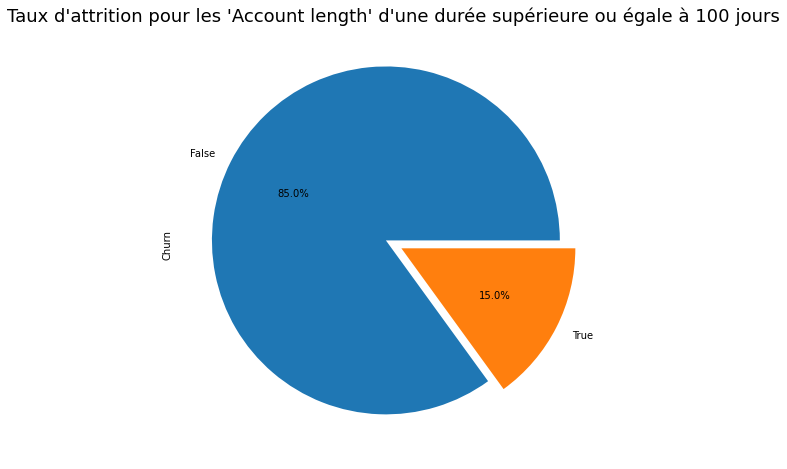

In [214]:
three_digit["Churn"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%.1f%%', figsize=(8,8))
plt.title("Taux d'attrition pour les 'Account length' d'une durée supérieure ou égale à 100 jours", fontsize=18)
plt.show()

### Observation

Le taux d'attrition des clients actifs depuis 100 jours ou plus s'élève à 15%. 
Il se peut que ces clients ne soient pas satisfaits des offres de fidélisation, il serait interessant de repenser ces offres afin d'améliorer la rétention des clients les plus anciens.



## Analyse de la colonne "International Plan"

In [346]:
# Total des clients qui ont un forfait international et total des clients qui n'ont pas de forfait international

telecom_df["International plan"].value_counts()

No     3010
Yes     323
Name: International plan, dtype: int64

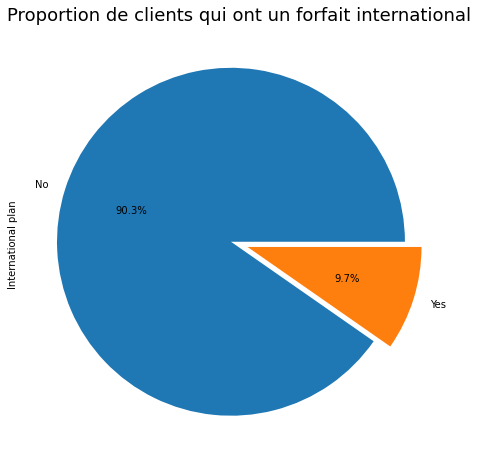

In [219]:
# Proportion des clients qui un forfait international

telecom_df["International plan"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%.1f%%', figsize=(8,8))
plt.title("Proportion de clients qui ont un forfait international", fontsize=18)
plt.show()

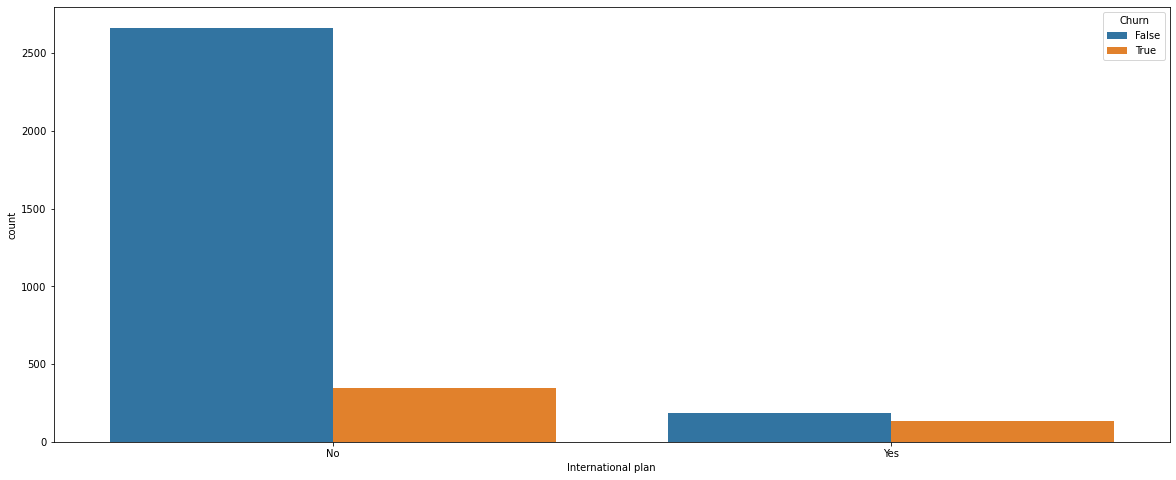

<Figure size 1152x720 with 0 Axes>

In [367]:
# Analyse de "International plan" avec un countplot

sns.countplot(x="International plan", hue="Churn", data=telecom_df)
plt.figure(figsize=(16,10))
plt.show()

In [409]:
# Taux d'attrition en fonction du forfait international 

telecom_df.groupby("International plan")["Churn"].mean()*100

International plan
No     11.495017
Yes    42.414861
Name: Churn, dtype: float64

### Observation 

Nous constatons que sur l'ensemble des 3333 clients de notre dataset:
-  3010 clients n'ont pas de forfait international,
-  323 clients ont un forfait international,
-  Le taux d'attrition des clients qui n'ont pas de forfait international est de 11,5%,
-  Le taux d'attrition des clients qui ont un forfait international est de 42,4%.

Donc les clients qui possèdent un forfait international ont un taux d'attrition très élevé. Cela peut s'expliquer par des prix trop élevés ou des problèmes de réseau mobile. 

## Analyse de la colonne "Voice mail plan"



In [226]:
# Valeurs uniques de la colonne "Voice mail plan"

telecom_df["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

In [228]:
# Nombre d'observations pour chaque valeur unique de la colonne "Voice mail plan"

telecom_df["Voice mail plan"].value_counts()

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

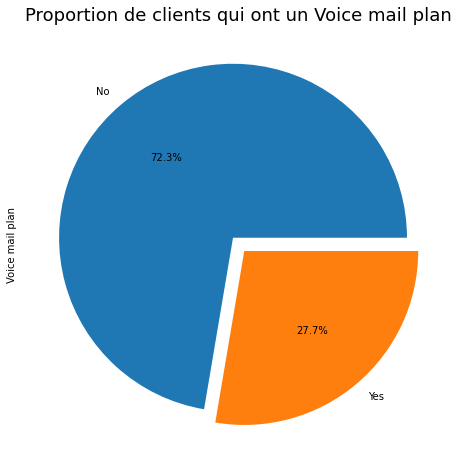

In [368]:
# Diagramme circulaire illustrant la proportion de clients qui ont souscrit à un Voice mail plan

telecom_df["Voice mail plan"].value_counts().plot.pie(explode=[0.05,0.05], autopct='%.1f%%', figsize=(8,8))
plt.title("Proportion de clients qui ont un Voice mail plan", fontsize=18)
plt.show()

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

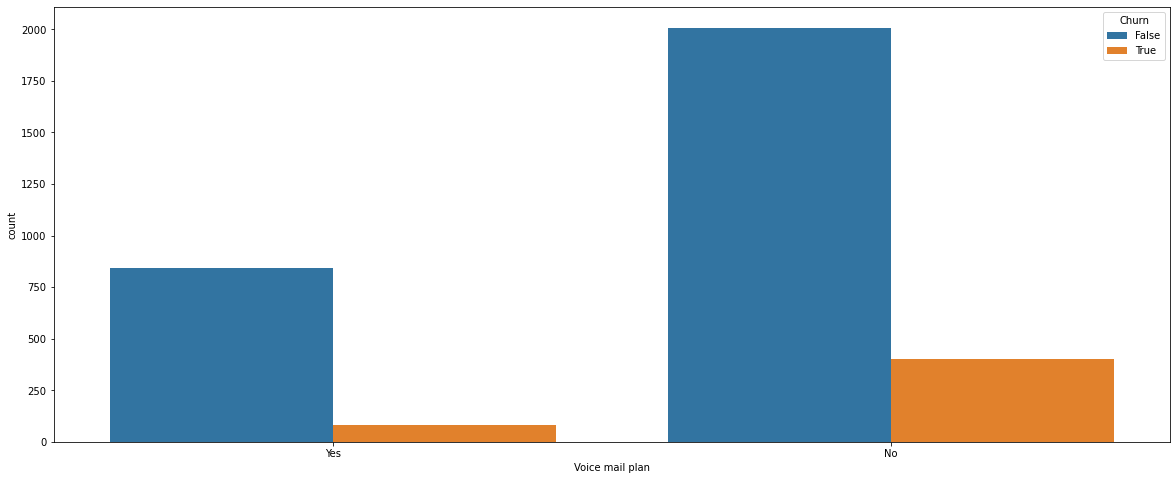

In [230]:
# Analyse de "Voice mail plan" avec un countplot

sns.countplot(x="Voice mail plan", hue="Churn", data=telecom_df)

In [231]:
# Moyenne des désabonnements en fonction du Voice mail plan

telecom_df.groupby("Voice mail plan")["Churn"].mean()*100

Voice mail plan
No     16.715056
Yes     8.676790
Name: Churn, dtype: float64

### Observation 

Nous constatons que sur l'ensemble des 3333 clients de notre dataset:
-  2411 clients n'ont pas de forfait incluant un voice mail plan,
-  922 clients ont un international avec un voice mail plan,
-  Le taux d'attrition des clients qui n'ont pas de voice mail plan est de 16,7%,
-  Le taux d'attrition des clients qui ont un voice mail plan est de 8,7%.



## Analyse de la colonne "Customer service calls"

In [235]:
# Nombre d'observations pour chaque valeur unique de la colonne "Customer service calls"

telecom_df["Customer service calls"].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

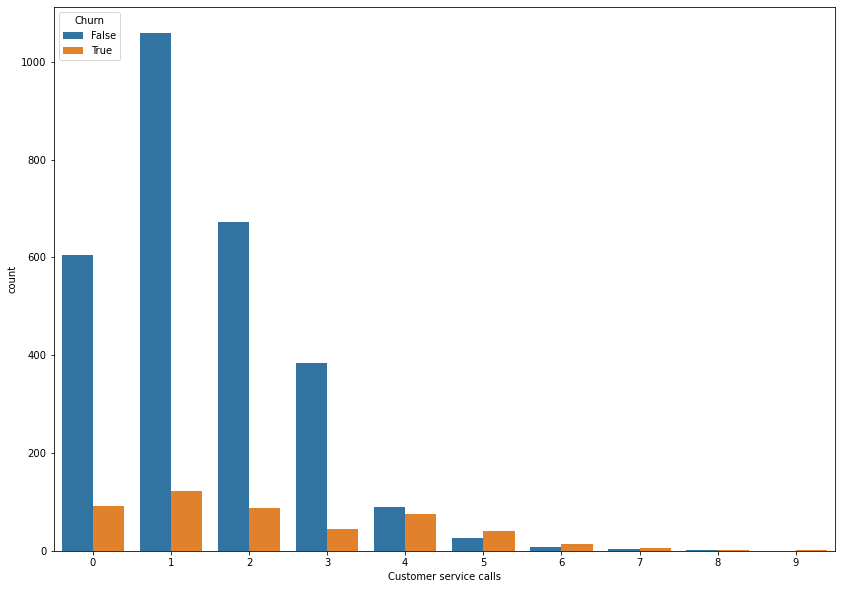

In [387]:
# Analyse de "Customer service calls" avec un countplot
# Nombre d'appels passés au service client par les clients désabonnés et abonnés.

plt.figure(figsize=(14,10))
sns.countplot(x="Customer service calls", hue="Churn", data=telecom_df)
plt.show()

In [388]:
# Taux d'attrition en fonction du nombre d'appels au service client 

telecom_df.groupby("Customer service calls")["Churn"].mean()*100

Customer service calls
0     13.199426
1     10.330229
2     11.462451
3     10.256410
4     45.783133
5     60.606061
6     63.636364
7     55.555556
8     50.000000
9    100.000000
Name: Churn, dtype: float64

### Observation 

Dans notre dataset, les appels au service client varient de 0 à 9.
Plus un client appelle le service client, plus il est probable que ce client se désabonne : 

- Le taux d'attrition des clients qui ont appelé 4 fois le service client s'élève à 45,7%,
- Le taux d'attrition des clients qui ont appelé 5 fois le service client s'élève à 61%,
- Le taux d'attrition des clients qui ont appelé 6 fois le service client s'élève à 63,6%,
- Le taux d'attrition des clients qui ont appelé 7 fois le service client s'élève à 55,5%
- Le taux d'attrition des clients qui ont appelé 8 fois le service client s'élève à 50%,
- Le taux d'attrition des clients qui ont appelé 9 fois le service client s'élève à 100%.

Nous constatons que le nombre d'appels au service client influence le taux d'attrition. Il est donc important de tout mettre en oeuvre pour que le(s) problème(s) rencontré(s) par les clients qui appellent le service soient rapidement résolus, au risque de perdre ces clients. 


/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


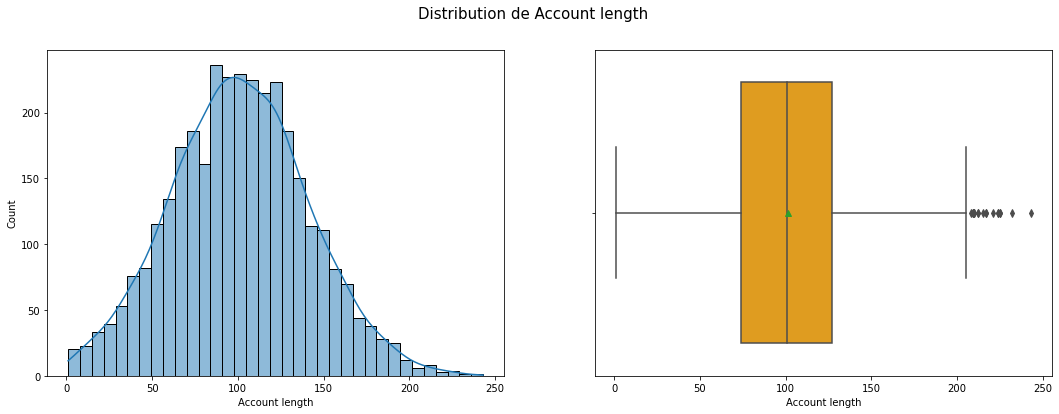

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


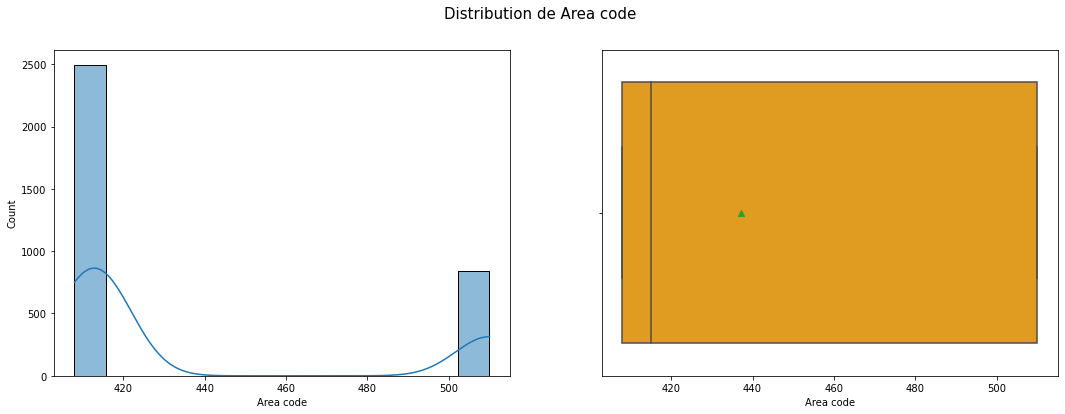

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


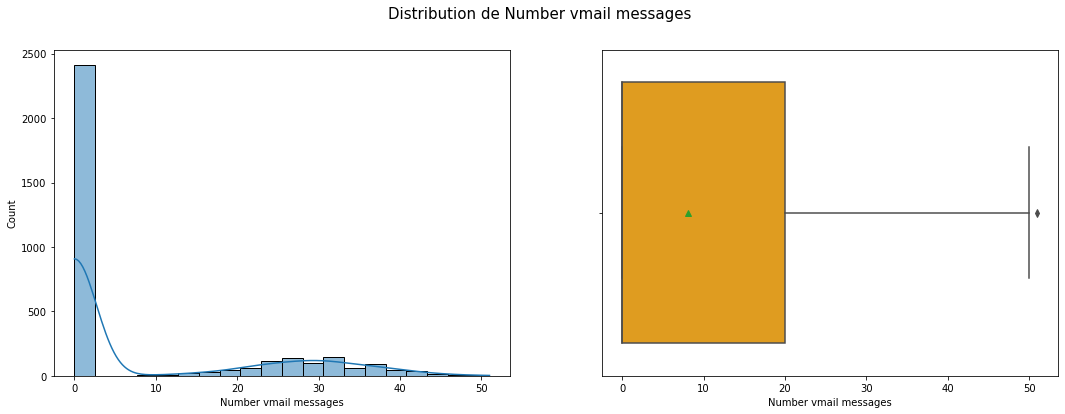

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


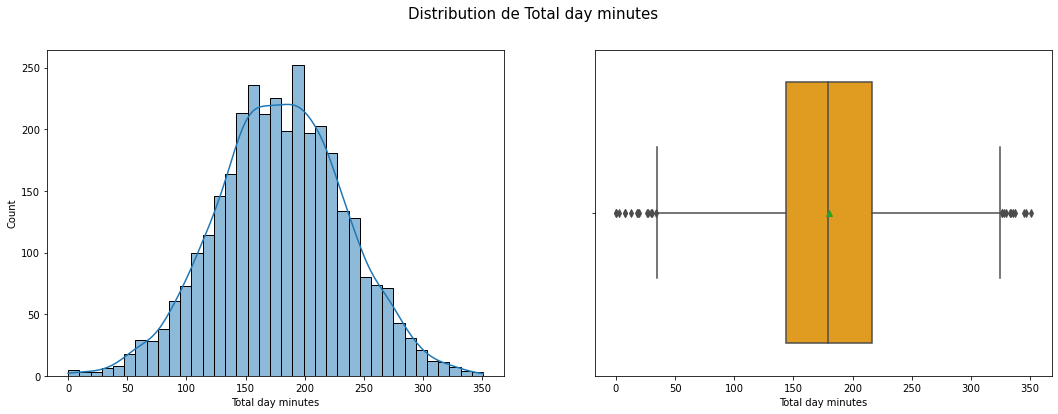

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


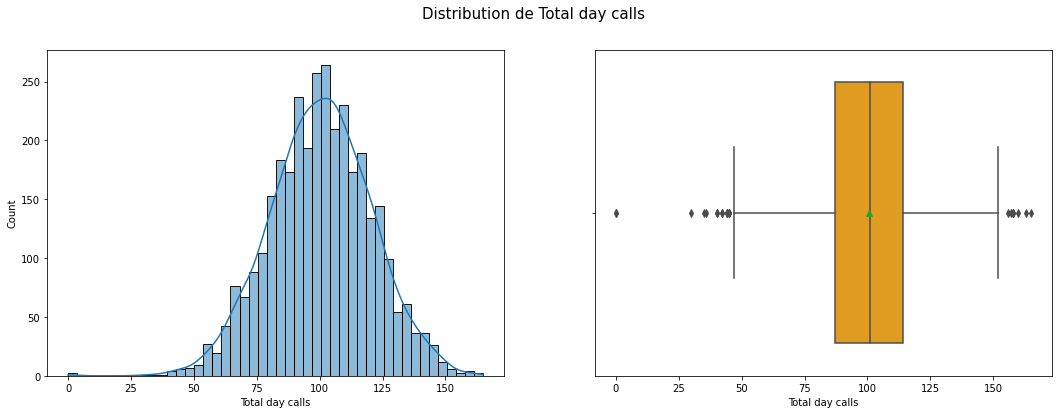

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


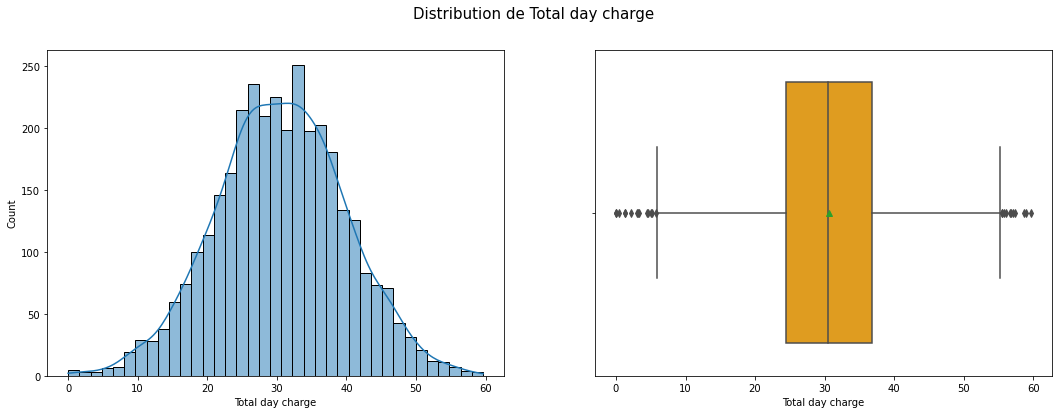

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


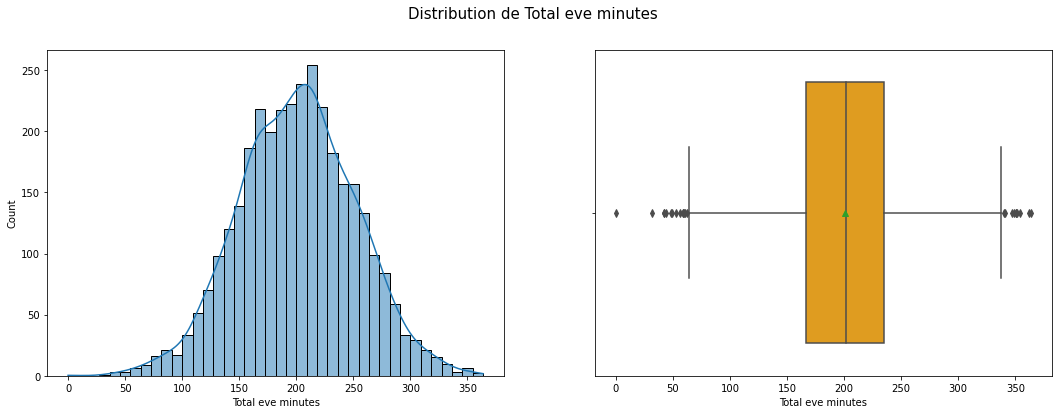

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


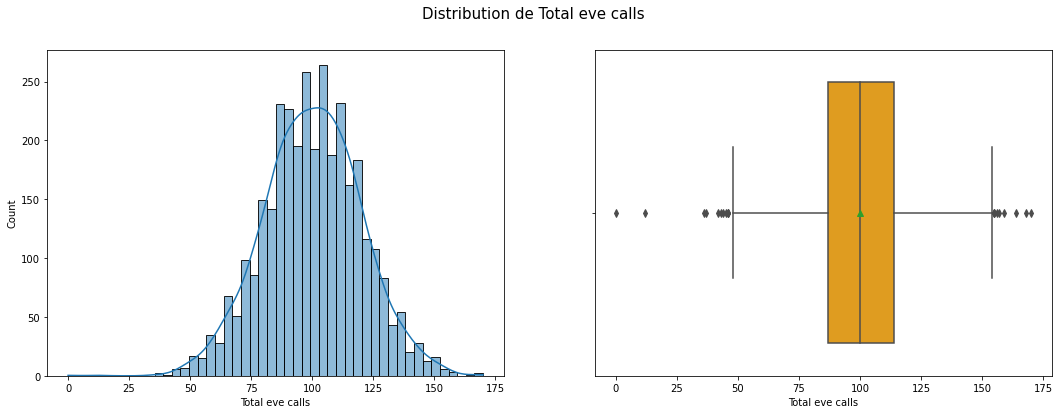

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


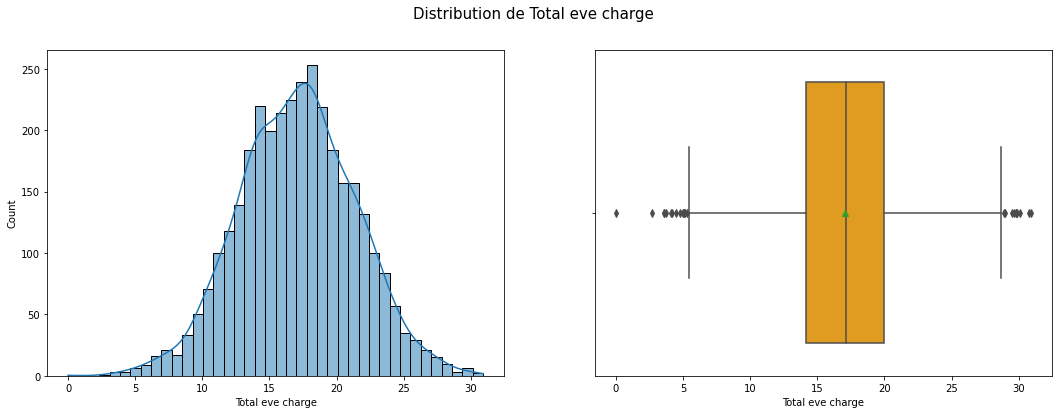

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


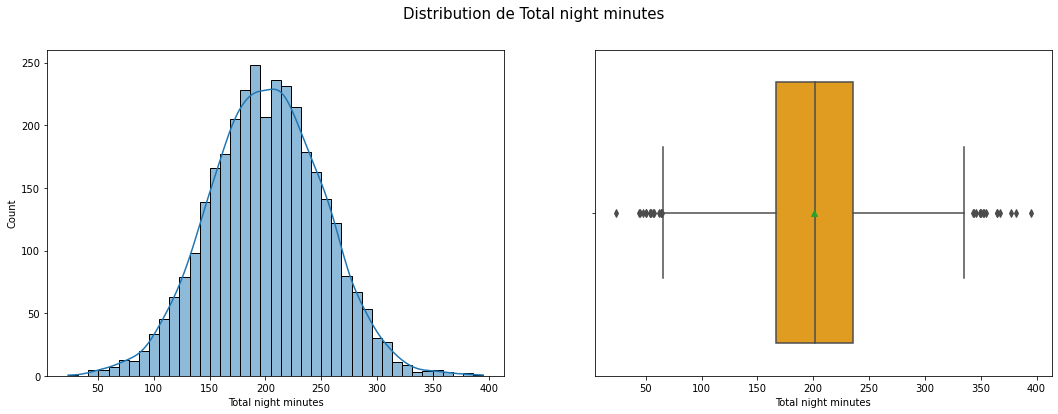

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


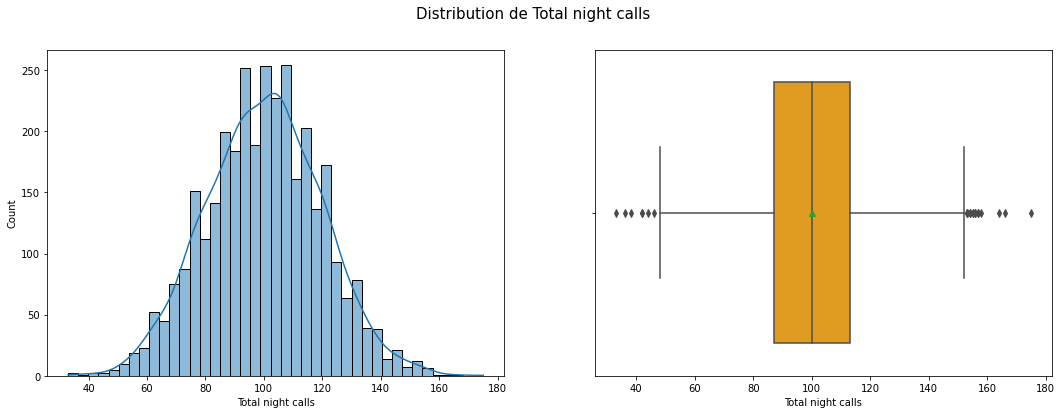

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


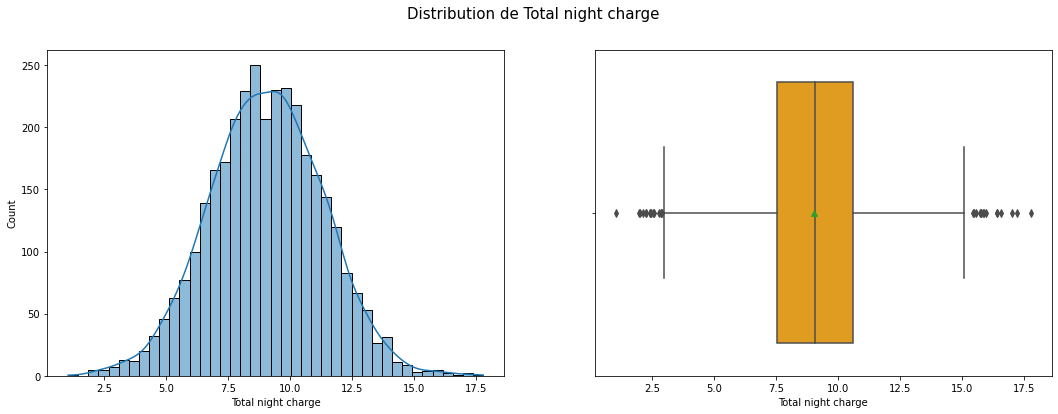

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


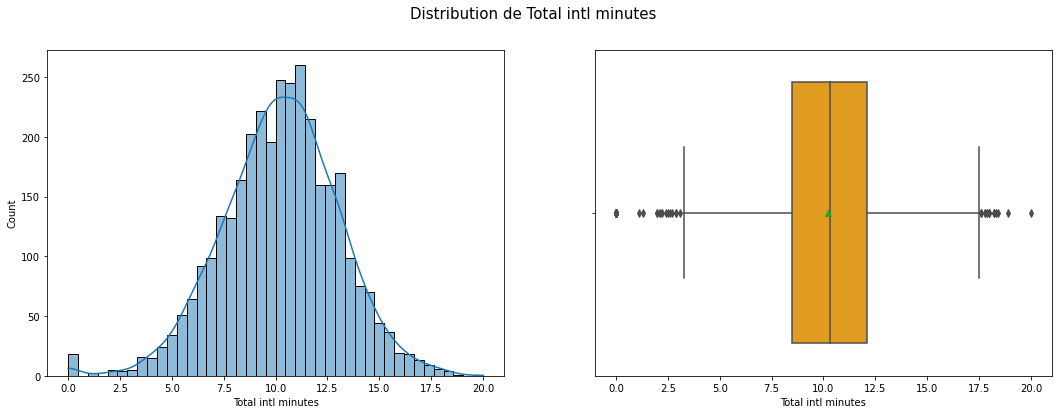

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


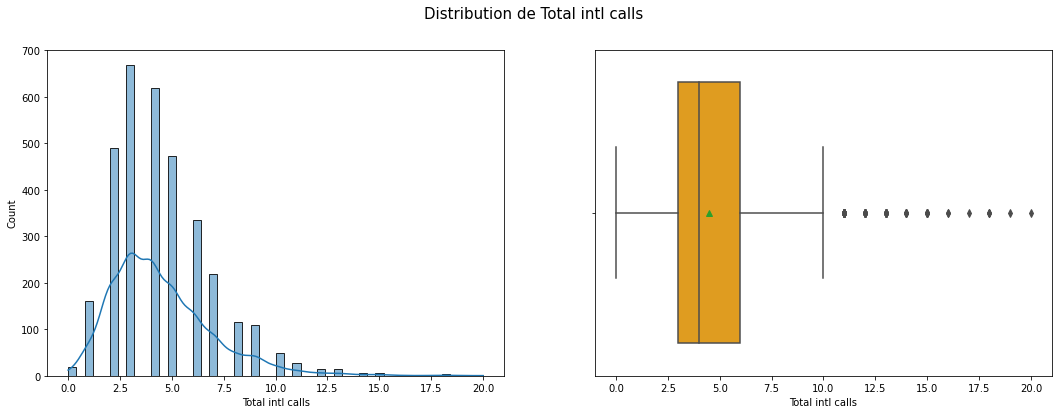

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


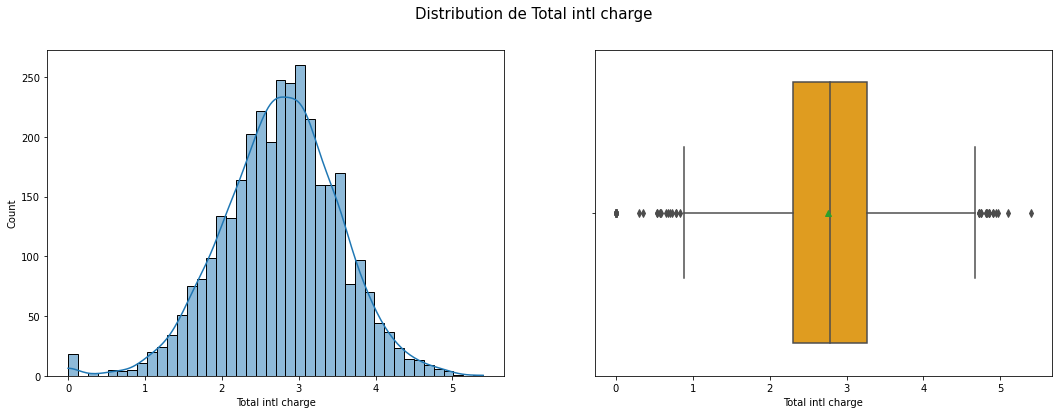

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


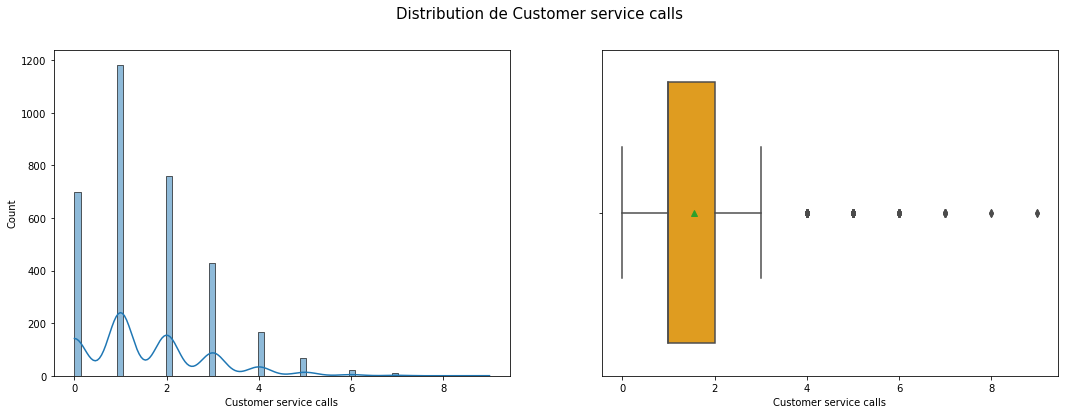

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


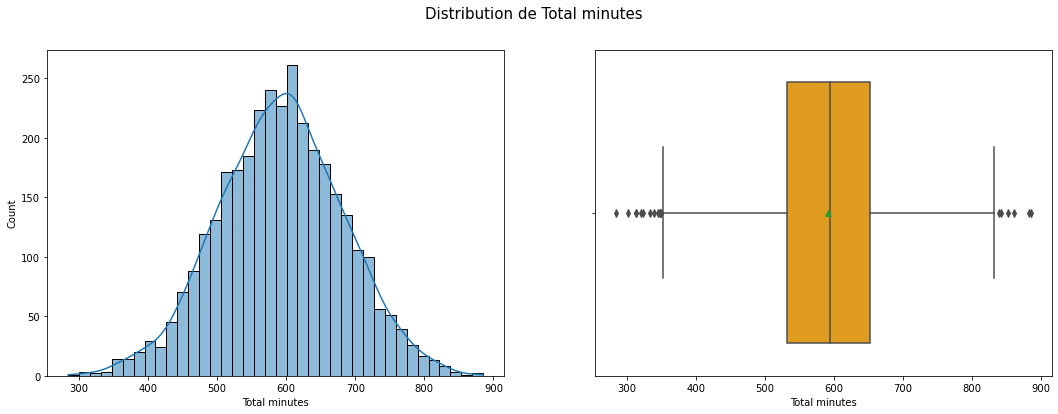

/Users/HadjerBoukhatem/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


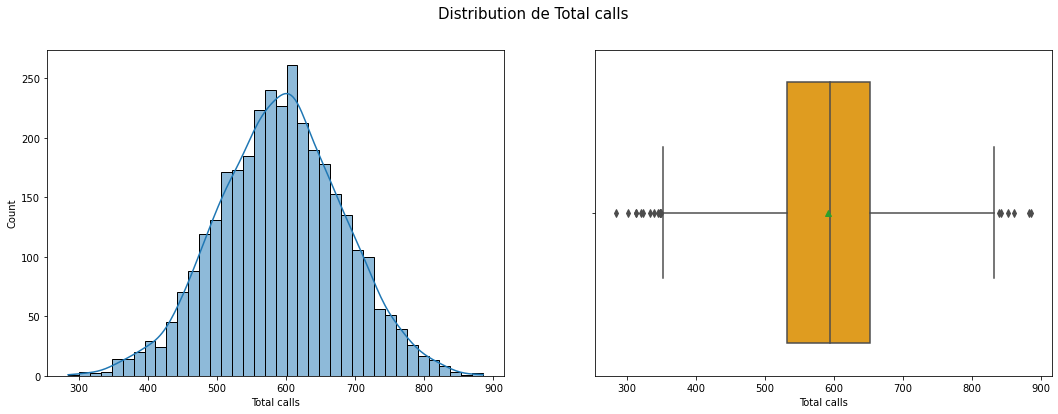

In [416]:
# Analyse de la distribution de chaque variable numérique à l'aide d'un histogramme et d'un boxplot

for col in telecom_df.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(telecom_df[col], ax = axes[0],kde = True)
    sns.boxplot(telecom_df[col], ax = axes[1],orient='h',showmeans=True,color="orange")
    fig.suptitle("Distribution de "+ col, fontsize = 15)
    plt.show()

### Observation 

Grâce aux histogrammes et aux boxplots ci-dessus, nous pouvons constater que presque toutes les variables numériques continues de notre dataset suivent une loi normale, elles sont distribuées de manière symétrique et la moyenne et la médiane sont à peu près égales. Les variables Area code et Customer service calls sont des variables numériques discrètes et peuvent être traitées comme des variables catégoriques étant donnée qu'elles ne prenent respectivement que 3 et 10 valeurs différentes.


## Analyse de tous les calls minutes, total calls et calls charge ensemble

In [246]:
# Analyse de la moyenne des appels passée le jour pour les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total day calls"].mean()

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64

In [247]:
# Analyse de la moyenne des durées d'appels en minutes passés jour pour les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total day minutes"].mean()

Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64

In [426]:
# Analyse de la moyenne du montant facturé pour les appels passés le jour par les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total day charge"].mean()

Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64

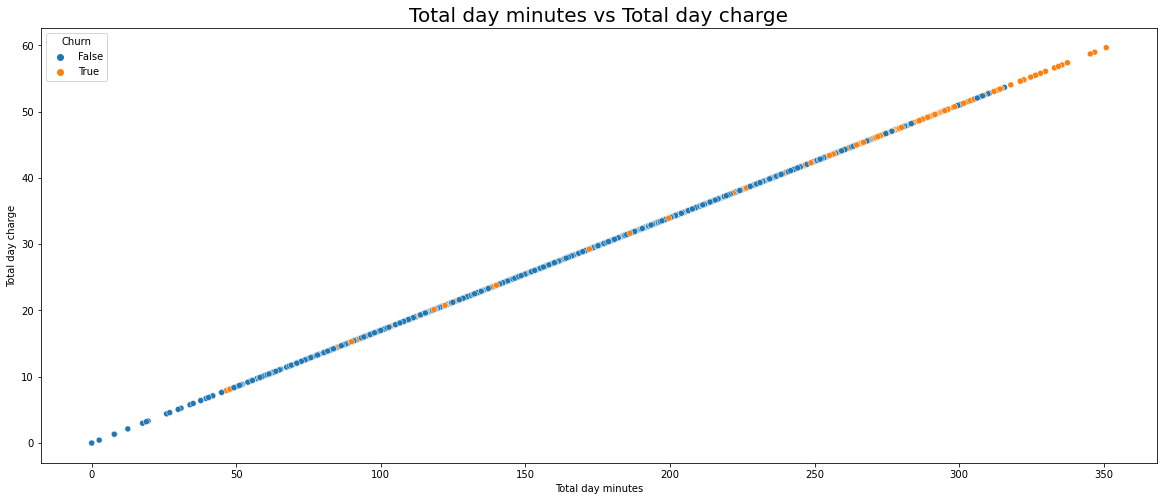

In [241]:
# Analyse de la relation "Total day minute" vs "Total day charge" avec un scatterplot

sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data =telecom_df)
plt.title("Total day minutes vs Total day charge", fontsize = 20)
plt.show()


In [250]:
# Analyse de la moyenne des appels passés le soir pour les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total eve calls"].mean()

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64

In [251]:
# Analyse de la moyenne des durées d'appels en minutes passés le soir pour les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total eve minutes"].mean()

Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64

In [427]:
# Analyse de la moyenne du montant facturé pour les appels passés le soir par les clients abonnés et désabonnés


telecom_df.groupby("Churn")["Total eve charge"].mean()

Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64

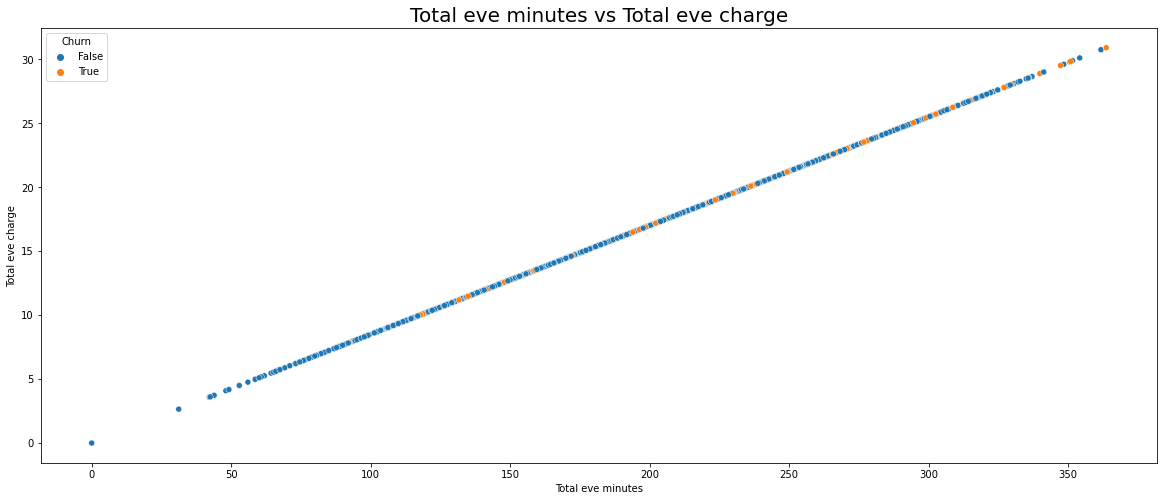

In [249]:
# Analyse de la relation "Total eve minute" vs "Total eve charge" avec un scatterplot

sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data =telecom_df)
plt.title("Total eve minutes vs Total eve charge", fontsize = 20)
plt.show()

In [255]:
# Analyse de la moyenne des appels passés la nuit pour les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total night calls"].mean()

Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64

In [256]:
# Analyse de la moyenne des durées d'appels en minutes par soir pour les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total night minutes"].mean()

Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64

In [428]:
# Analyse de la moyenne du montant facturé pour les appels passés la nuit par les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total night charge"].mean()

Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64

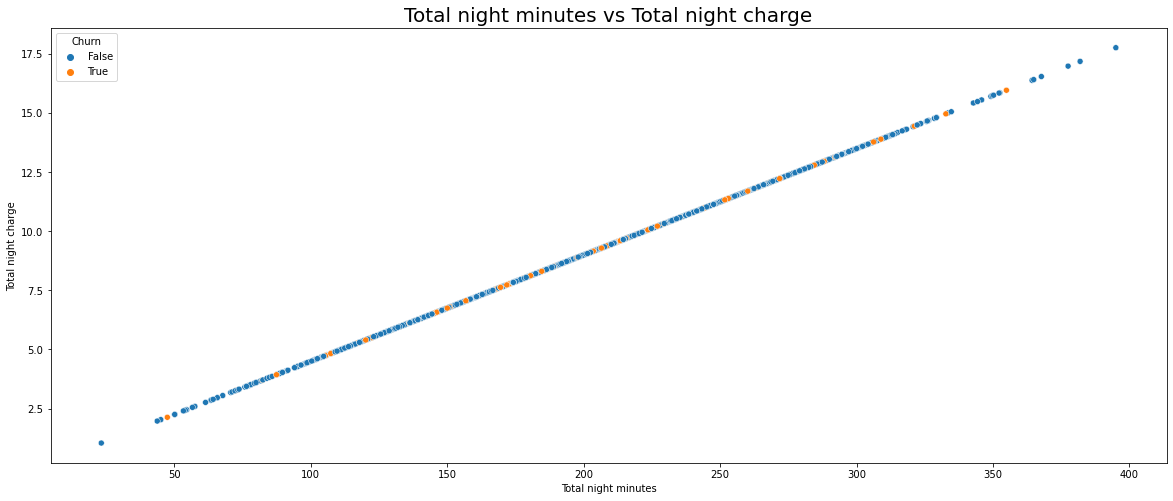

In [254]:
# Analyse de la relation "Total night minutes" vs "Total night charge" avec un scatterplot

sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data =telecom_df)
plt.title("Total night minutes vs Total night charge", fontsize = 20)
plt.show()


In [259]:
# Analyse de la moyenne des appels passés à l'international pour les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total intl calls"].mean()

Churn
False    4.532982
True     4.163561
Name: Total intl calls, dtype: float64

In [260]:
# Analyse de la moyenne des durées d'appels en minutes passés à l'international pour les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total intl minutes"].mean()

Churn
False    10.158877
True     10.700000
Name: Total intl minutes, dtype: float64

In [429]:
# Analyse de la moyenne du montant facturé pour les appels passés à l'international par les clients abonnés et désabonnés

telecom_df.groupby("Churn")["Total intl charge"].mean()

Churn
False    2.743404
True     2.889545
Name: Total intl charge, dtype: float64

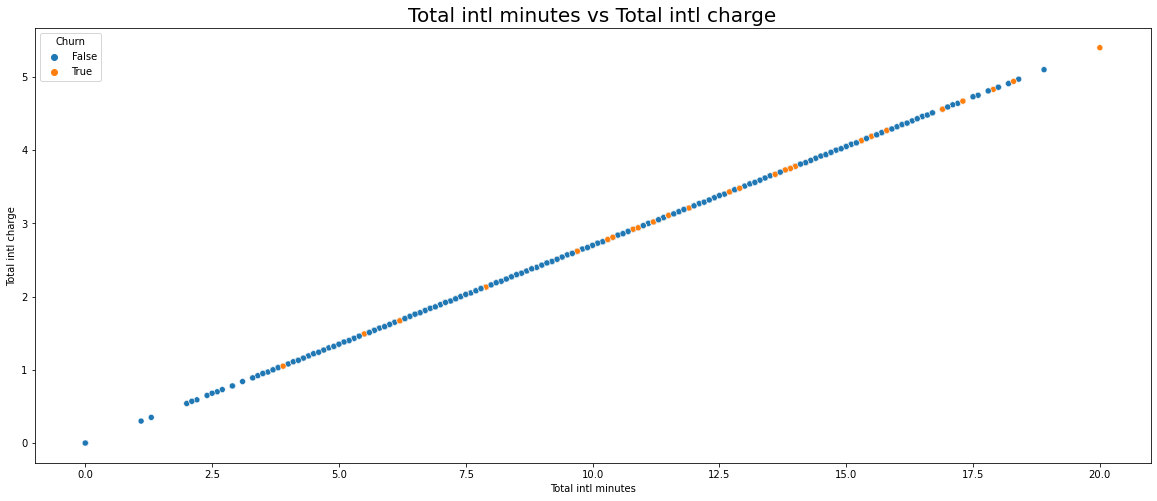

In [258]:
# Analyse de la relation "Total intl minutes" vs "Total intl charge" avec un scatterplot

sns.scatterplot(x="Total intl minutes", y="Total intl charge", hue="Churn", data =telecom_df)
plt.title("Total intl minutes vs Total intl charge", fontsize = 20)
plt.show()

In [281]:
avg_minutes = telecom_df.groupby(["Churn"])["Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes"].mean()
avg_minutes

/var/folders/2b/3y99dphx3t1fsr95y8k10zf40000gn/T/ipykernel_47098/1259737392.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_minutes = telecom_df.groupby(["Churn"])["Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes"].mean()


,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes
Churn,,,,
False,175.175754,199.043298,200.133193,10.158877
True,206.914079,212.410145,205.231677,10.700000


Text(0, 0.5, 'Moyenne en minutes')

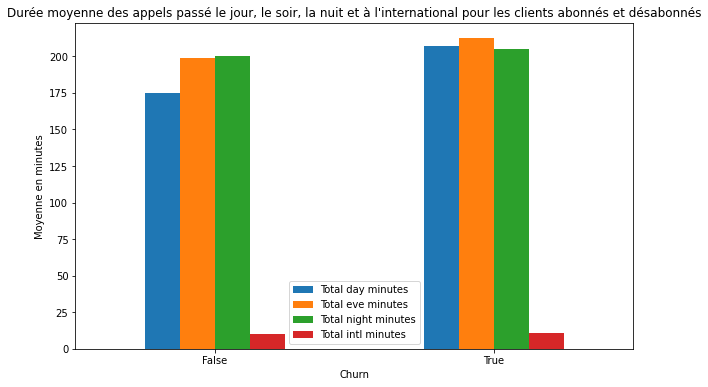

In [294]:
# Moyenne des total day minutes, total eve minutes, total night minutes, total intl minutes des clients abonnés et désabonnés

avg_minutes.plot(kind="bar", figsize=(10,6))
plt.xticks(rotation=360)
plt.title("Durée moyenne des appels passé le jour, le soir, la nuit et à l'international pour les clients abonnés et désabonnés")
plt.ylabel("Moyenne en minutes")

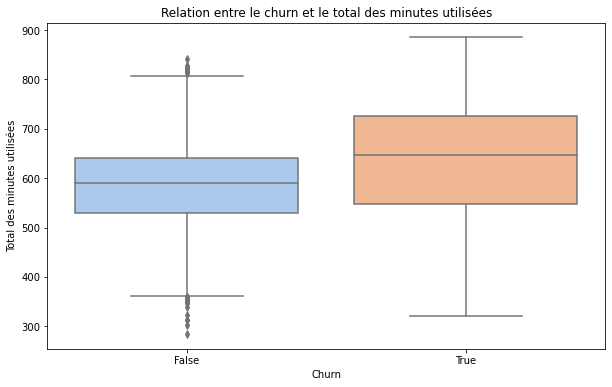

In [418]:
# Comparaison du total des minutes d'appels des clients abonnés et désabonnés


total_minutes_cols = ["Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes"]
telecom_df["Total minutes"] = telecom_df[total_minutes_cols].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Churn", y="Total minutes", data=telecom_df, palette='pastel')
plt.title("Relation entre le churn et le total des minutes utilisées")
plt.xlabel("Churn")
plt.ylabel("Total des minutes utilisées")
plt.show()

### Observation

Nous constatons que la médiane du total des minutes utilisées par les clients désabonnés est plus élevée que celle des clients abonnés, cela pourrait indiquer qu'il existe une relation entre la durée des appels et les désabonnements. 

In [376]:
avg_charges = telecom_df.groupby(["Churn"])["Total day charge", "Total eve charge", "Total night charge", "Total intl charge"].mean()
avg_charges

/var/folders/2b/3y99dphx3t1fsr95y8k10zf40000gn/T/ipykernel_47098/2675183562.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_charges = telecom_df.groupby(["Churn"])["Total day charge", "Total eve charge", "Total night charge", "Total intl charge"].mean()


,Total day charge,Total eve charge,Total night charge,Total intl charge
Churn,,,,
False,29.780421,16.918909,9.006074,2.743404
True,35.175921,18.054969,9.235528,2.889545


Text(0, 0.5, 'Coût moyen')

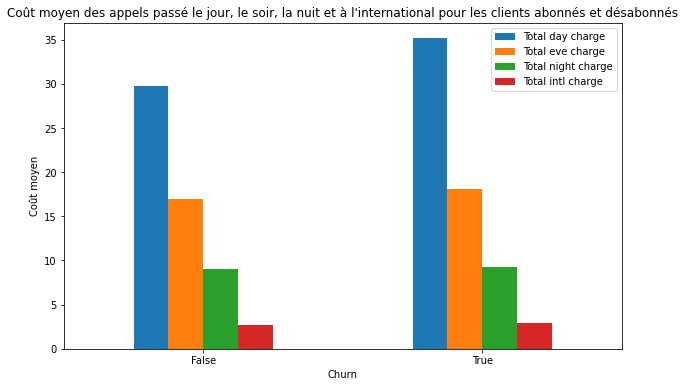

In [417]:
# Moyenne des total day charge, total eve charge, total night charge, total intl charge des clients abonnés et désabonnés

avg_charges.plot(kind="bar", figsize=(10,6))
plt.xticks(rotation=360)
plt.title("Coût moyen des appels passé le jour, le soir, la nuit et à l'international pour les clients abonnés et désabonnés")
plt.ylabel("Coût moyen")

### Observation 

Les clients désabonnés ont plus de temps d'appel total (en journée, le soir, la nuit et à l'international) que les clients abonnés, ils sont donc plus facturés que les clients abonnés puisqu'il existe une corrélation linéaire positive parfaite entre le temps d'appels et les frais d'appels (cf. les scatterplot ci-dessus, et la carte des corrélations ci-dessous).

Lorsque le temps d'appel augmente, le montant total facturé pour ces appels augmente également de manière proportionnelle, sans exception, que ce soit la journée, le soir, la nuit ou à l'international.

Nous pourrions essayer de retenir ces clients en leur proposant une réduction ou en leur offrant quelques minutes  gratuites.

In [304]:
# Prix moyen de la minute d'appel en journée, le soir, la nuit et à l'international

day_charge_perm= telecom_df["Total day charge"].mean()/telecom_df["Total day minutes"].mean()
eve_charge_perm= telecom_df["Total eve charge"].mean()/telecom_df["Total eve minutes"].mean()
night_charge_perm= telecom_df["Total night charge"].mean()/telecom_df["Total night minutes"].mean()
intl_charge_perm= telecom_df["Total intl charge"].mean()/telecom_df["Total intl minutes"].mean()
print ([day_charge_perm, eve_charge_perm, night_charge_perm, intl_charge_perm])


[0.1700030073913066, 0.08500104871485774, 0.04500041448440013, 0.2700500279887098]


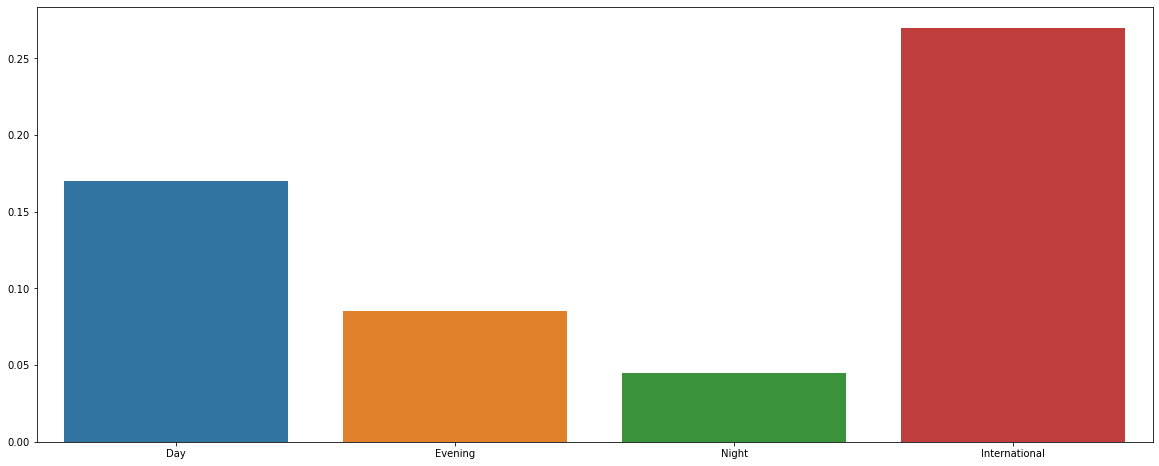

In [380]:
sns.barplot(x=["Day","Evening","Night","International"], y= [day_charge_perm, eve_charge_perm, night_charge_perm, intl_charge_perm])
plt.show()

### Observation 

Nous constatons que le prix moyen de la minute d'appel à l'international est le plus élevé ce qui est normal. 

## Carte des corrélations

Text(0.5, 1.0, 'Carte des corrélations')

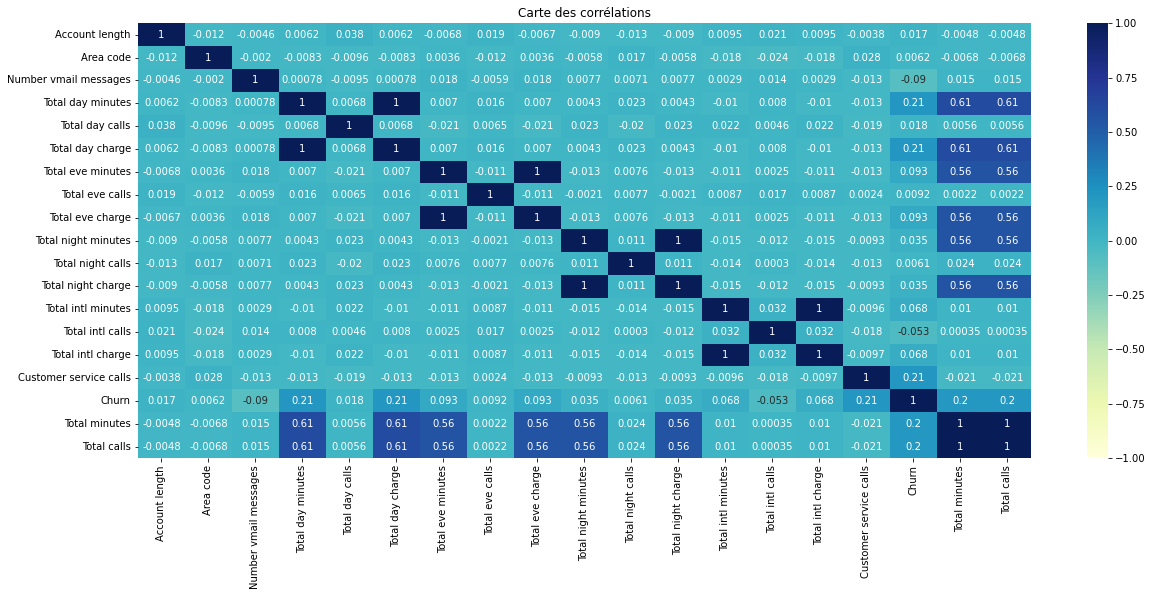

In [414]:
# Carte des corrélations 

correlation = telecom_df.corr()
sns.heatmap(correlation, annot= True, vmin= -1, vmax=1, cmap="YlGnBu").set_title("Carte des corrélations")

### Observation 

Nous constatons qu'il existe une corrélation linéaire positive parfaite (coefficient de corrélation égal à 1) entre les variables : 
-  Total day charge et Total day minutes,
-  Total eve charge et Total eve minutes,
-  Total night charge et Total nights minutes, 
-  Total intl charge et Total intl minutes.


# Conclusion 

Après avoir effectué une analyse exploratoire des données de notre jeu de données, voici ce que nous avons constaté :

-  Il existe des États où le taux de résiliation est très élevé par rapport à d'autres, cela est peut-être dû à une faible couverture réseau.
-  Le taux d'attrition des clients qui ont un forfait international est très élevé. Nous savons que les frais d'appels internationaux sont les plus élevés, cela peut jouer un rôle dans le taux d'attrition, il se peut aussi que la couverture réseau ne soit pas satisfaisante. 
-  Les clients qui ont passé plus de 4 appels au service client ont significativement plus de chances de se désabonner.
-  Il existe une corrélation positive parfaite entre les variables de frais et les variables de minutes (lorsque le temps d'appel augmente, le montant total facturé pour ces appels augmente également de manière proportionnelle, sans exception, que ce soit la journée, le soir, la nuit ou à l'international).
-  Les clients désabonnés ont plus de temps d'appel total que les clients abonnés. 
-  Il n'y a pas de relation entre l'Area code et le taux d'attrition, et pas de relation claire entre l'Account length et le taux d'attrition.



Proposition de solutions pour réduire le taux de désabonnement des clients Orange :


-  Examiner les problèmes rencontrés par les clients dans les Etats où le taux d'attrition est élevé.
-  Améliorer la couverture réseau dans les Etats où les taux d'attrition sont élevés.
-  Améliorer le service client et receuillir régulièrement des avis clients concernant le(s) problème(s) qu'ils rencontrent et essayer de le(s) résoudre le plus rapidement possible.
-  Proposer des offres aux clients ayant un forfait international.
-  Demander régulièrement des retours aux clients afin de connaître leur niveau de satisfaction.  


